<a href="https://colab.research.google.com/github/Ira-a02/DataAnalysis/blob/main/ml12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [4]:
from google.colab import files
files.upload()

Saving abalone.csv to abalone.csv


{'abalone.csv': b'Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings\nM,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15\nM,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7\nF,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9\nM,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10\nI,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7\nI,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8\nF,0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20\nF,0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16\nM,0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9\nF,0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19\nF,0.525,0.38,0.14,0.6065,0.194,0.1475,0.21,14\nM,0.43,0.35,0.11,0.406,0.1675,0.081,0.135,10\nM,0.49,0.38,0.135,0.5415,0.2175,0.095,0.19,11\nF,0.535,0.405,0.145,0.6845,0.2725,0.171,0.205,10\nF,0.47,0.355,0.1,0.4755,0.1675,0.0805,0.185,10\nM,0.5,0.4,0.13,0.6645,0.258,0.133,0.24,12\nI,0.355,0.28,0.085,0.2905,0.095,0.0395,0.115,7\nF,0.44,0.34,0.1,0.451,0.188,0.087,0.13,10\nM,0.365,0.295,0.08,0.2555,0.097,0.043,0.1,7\nM,0.45,

 1. Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [7]:
df = pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


 2. Преобразуйте признак Sex в числовой: значение F должно перейти в-1, I в 0, M в 1. Если вы используете Pandas, то подойдет 2 следующий код: data[’Sex’] = data[’Sex’].map(lambda x: 1 if x == ’M’ else (-1 if x == ’F’ else 0))

In [8]:
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

 3. Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных признаки.

In [30]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values.ravel()

 4. Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (random_state=1). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1"и "shuffle=True"при создании генератора кроссвалидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score)

In [31]:
score_memory={}
kf = KFold(random_state=1,shuffle=True)
for N in range(1,51):
    model = RandomForestRegressor(n_estimators=N, random_state=1)
    scores = cross_val_score(model, X, y, scoring='r2' ,cv=kf)
    score_memory[N] = scores.mean()

 5. Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.

In [41]:
ms=make_scorer(r2_score)
score_memory={}
kf = KFold(random_state=1,shuffle=True)

for N in range(1,51):
    model = RandomForestRegressor(n_estimators = N, random_state = 1)
    scores = cross_val_score(model, X, y, scoring=ms ,cv=kf)
    mean_score = scores.mean()
    if (mean_score > 0.52):
      score_memory[N] = mean_score

In [43]:
print(score_memory)

{21: np.float64(0.520529096463528), 22: np.float64(0.5208044230080824), 23: np.float64(0.521742855685855), 24: np.float64(0.5231059969795335), 25: np.float64(0.5232486470488318), 26: np.float64(0.5243076139284634), 27: np.float64(0.5246393588459404), 28: np.float64(0.5256557724971402), 29: np.float64(0.5265556293057552), 30: np.float64(0.5270858715838138), 31: np.float64(0.5276420438225101), 32: np.float64(0.5289244806388986), 33: np.float64(0.5301073722643779), 34: np.float64(0.5299613734264366), 35: np.float64(0.5298209779129148), 36: np.float64(0.529910050667947), 37: np.float64(0.5294320415136227), 38: np.float64(0.5294715388671245), 39: np.float64(0.529515898349607), 40: np.float64(0.5294703580378128), 41: np.float64(0.5298087685207094), 42: np.float64(0.5300433306143383), 43: np.float64(0.5299135764090978), 44: np.float64(0.5296814957917958), 45: np.float64(0.528908112349864), 46: np.float64(0.5290083070325597), 47: np.float64(0.5291786571646144), 48: np.float64(0.530050939631563

In [47]:
with open('count_tree.txt','w') as file:
  file.write('21')

 6. Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

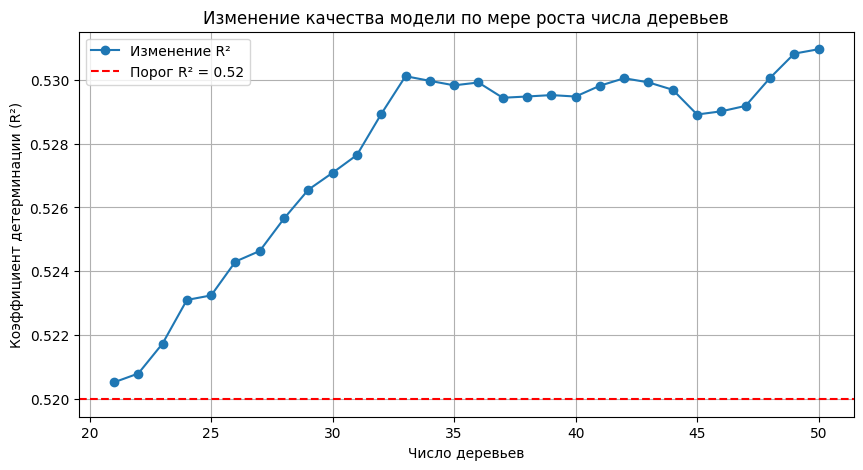

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(score_memory.keys(), score_memory.values(), marker='o',  label='Изменение R²')
plt.axhline(y=0.52, color='r', linestyle='--', label='Порог R² = 0.52')
plt.title('Изменение качества модели по мере роста числа деревьев')
plt.xlabel('Число деревьев')
plt.ylabel('Коэффициент детерминации (R²)')
plt.legend()
plt.grid()
plt.show()

In [46]:
with open('change_quality_to_worse.txt','w') as file:
  file.write('No')